In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
pd.set_option('display.max_columns', None)

In [40]:
airport_df = pd.read_csv("C:\\Users\\fdeen\\Downloads\\complaints-by-airport.csv")
category_df = pd.read_csv("C:\\Users\\fdeen\\Downloads\\complaints-by-category.csv")
subcategory_df = pd.read_csv("C:\\Users\\fdeen\\Downloads\\complaints-by-subcategory.csv")
iata_icao_df = pd.read_csv("C:\\Users\\fdeen\\Downloads\\iata-icao.csv")

# Heatmap of Monthly Complaints by Airport

In [43]:
airport_df['year_month'] = pd.to_datetime(airport_df['year_month'])
heatmap_data = airport_df.pivot_table(index='airport',
                                      columns=airport_df['year_month'].dt.to_period("M"),
                                      values='count', aggfunc='sum', fill_value=0)

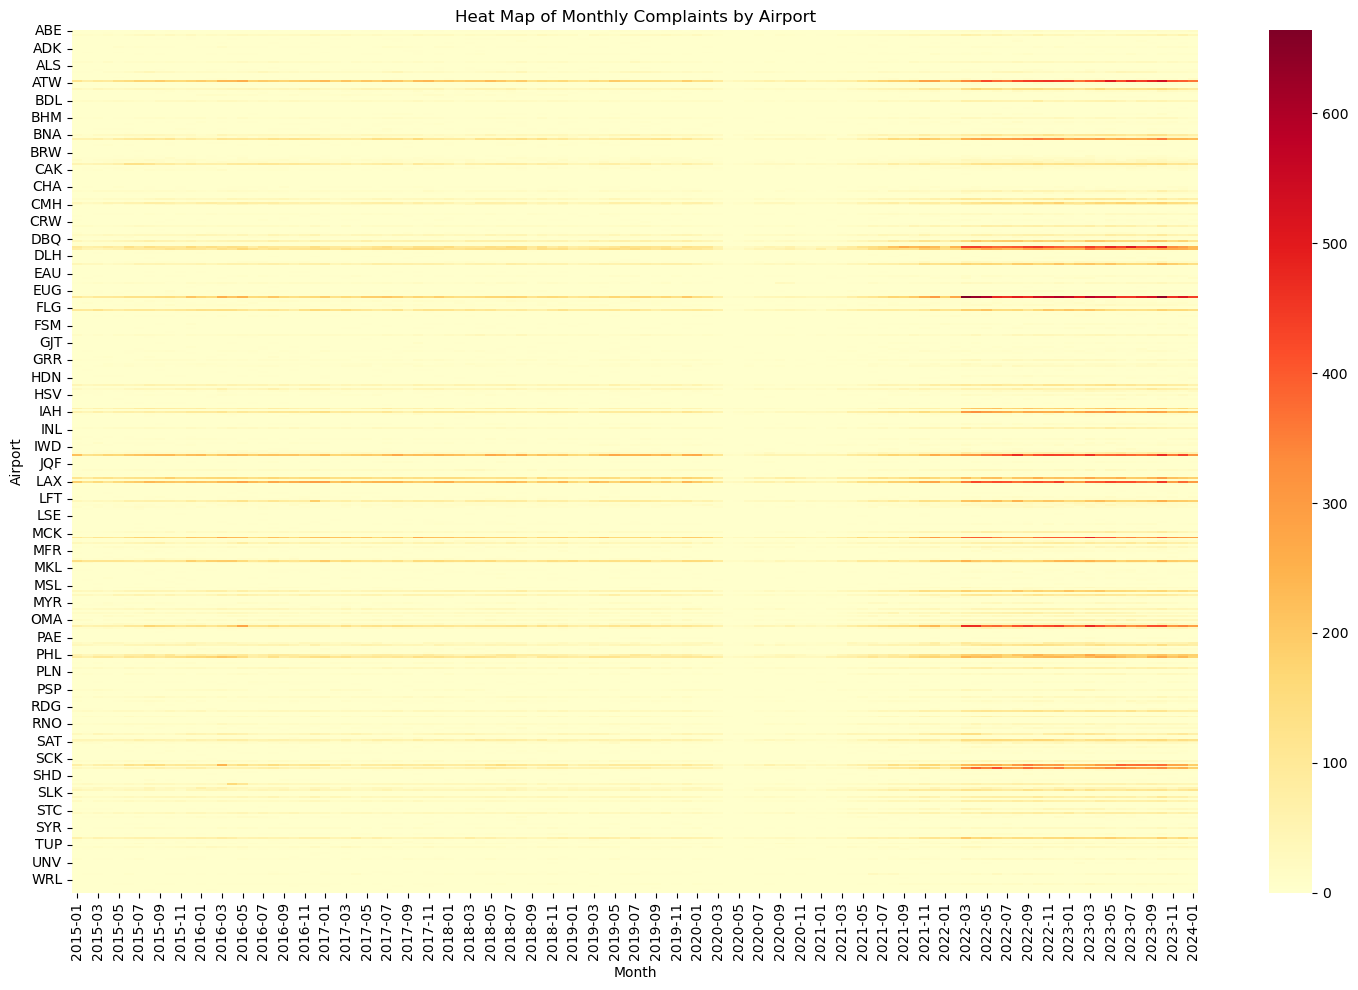

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title("Heat Map of Monthly Complaints by Airport")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

# Box Plot of Complaints by Category

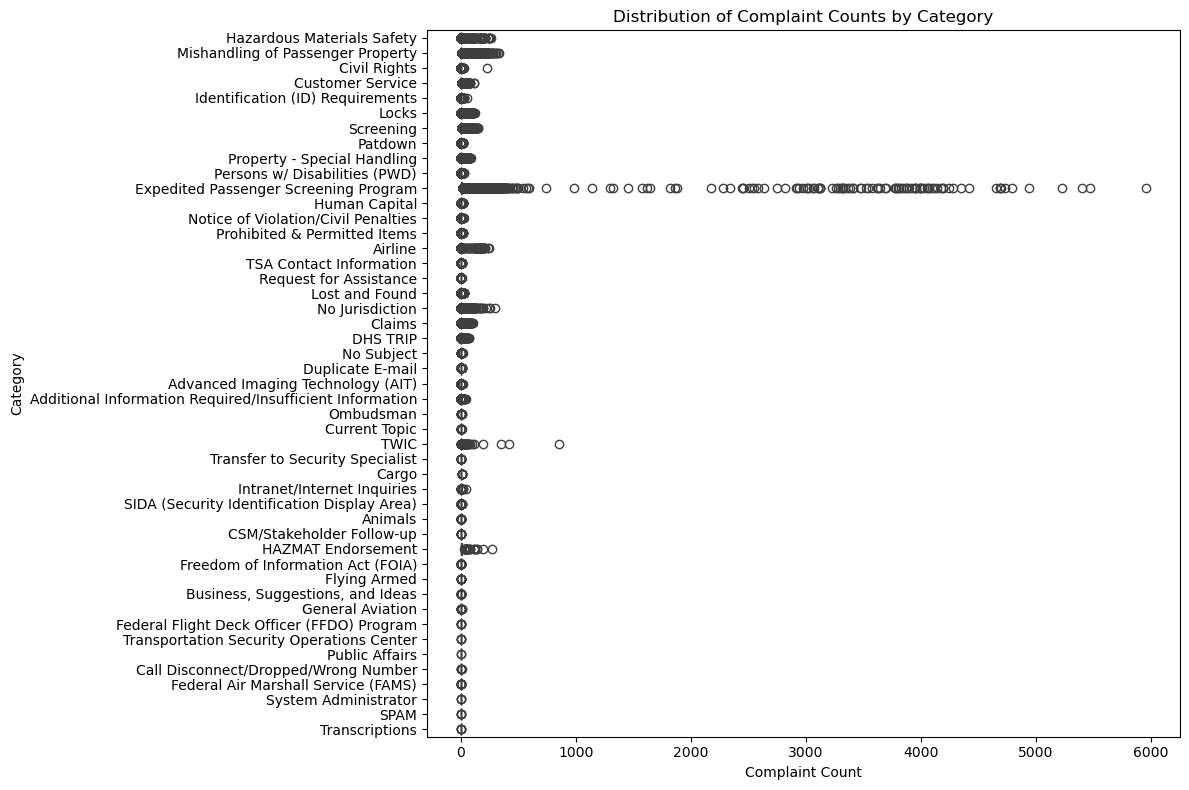

In [48]:
category_df['count'] = pd.to_numeric(category_df['count'], errors='coerce')
plt.figure(figsize=(12, 8))
sns.boxplot(data=category_df, x='count', y='clean_cat', orient='h')
plt.title("Distribution of Complaint Counts by Category")
plt.xlabel("Complaint Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Choropleth/Spatial Visual

In [51]:
latest_month = airport_df['year_month'].max().strftime('%Y-%m')
latest_geo_df = airport_df[airport_df['year_month'].dt.strftime('%Y-%m') == latest_month]
merged_geo = latest_geo_df.merge(iata_icao_df, on='airport', how='left').dropna(subset=['latitude', 'longitude'])


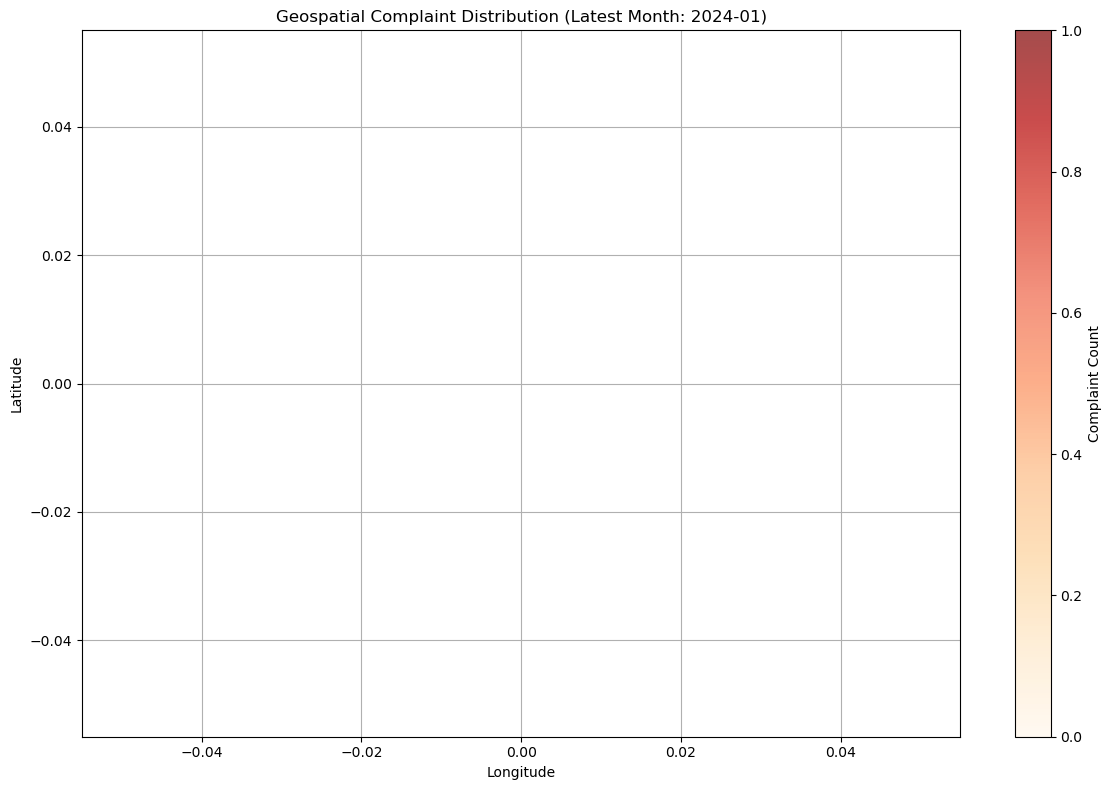

In [53]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(merged_geo['longitude'], merged_geo['latitude'],
                      s=merged_geo['count'], c=merged_geo['count'],
                      cmap='OrRd', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Complaint Count')
plt.title(f"Geospatial Complaint Distribution (Latest Month: {latest_month})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line Chart of Top 5 Airports

In [56]:
top_airports = airport_df.groupby('airport')['count'].sum().nlargest(5).index
top_airports_df = airport_df[airport_df['airport'].isin(top_airports)]

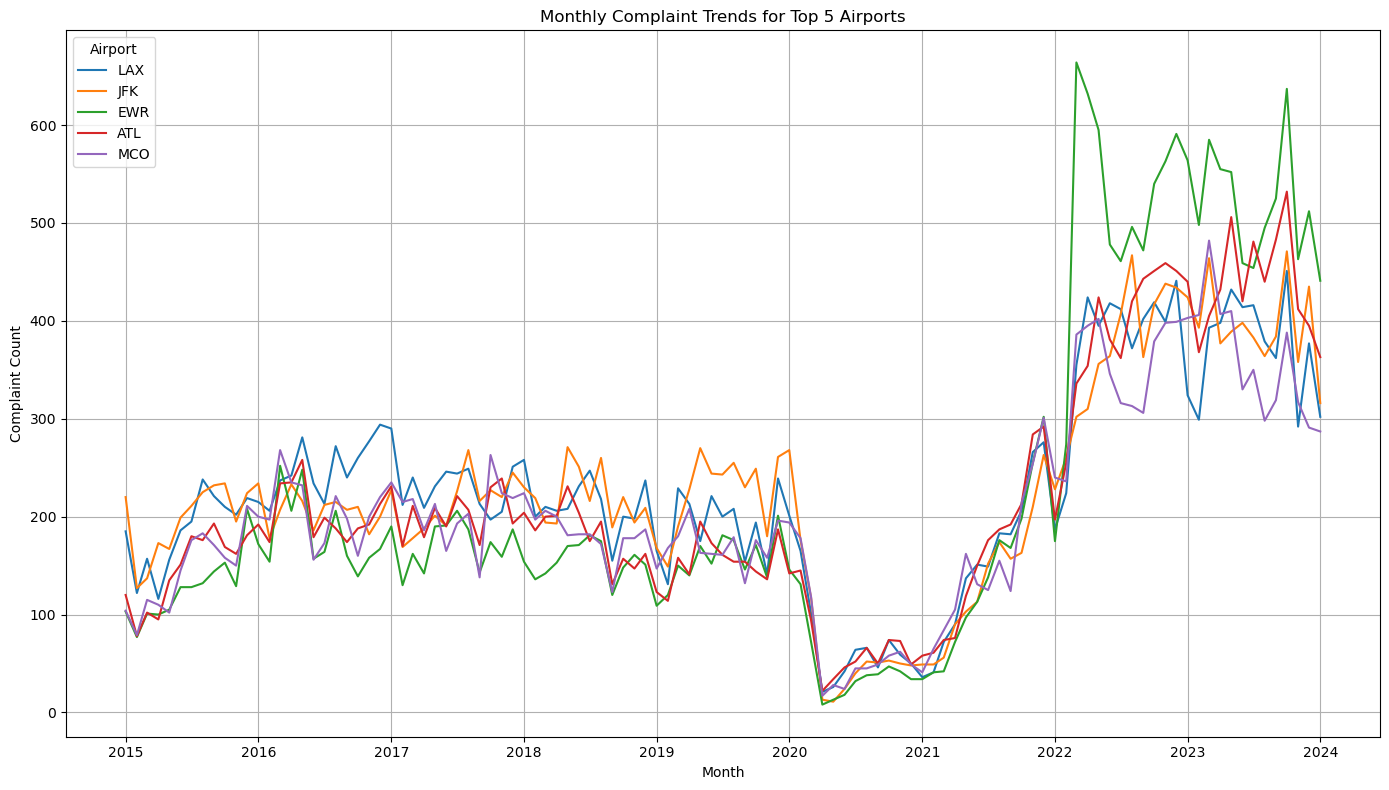

In [58]:
plt.figure(figsize=(14, 8))
for airport in top_airports:
    temp = top_airports_df[top_airports_df['airport'] == airport]
    plt.plot(temp['year_month'], temp['count'], label=airport)

plt.title("Monthly Complaint Trends for Top 5 Airports")
plt.xlabel("Month")
plt.ylabel("Complaint Count")
plt.legend(title="Airport")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot of Top Complaint Categories

C:\Users\fdeen\AppData\Local\Temp\ipykernel_15116\1772262825.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




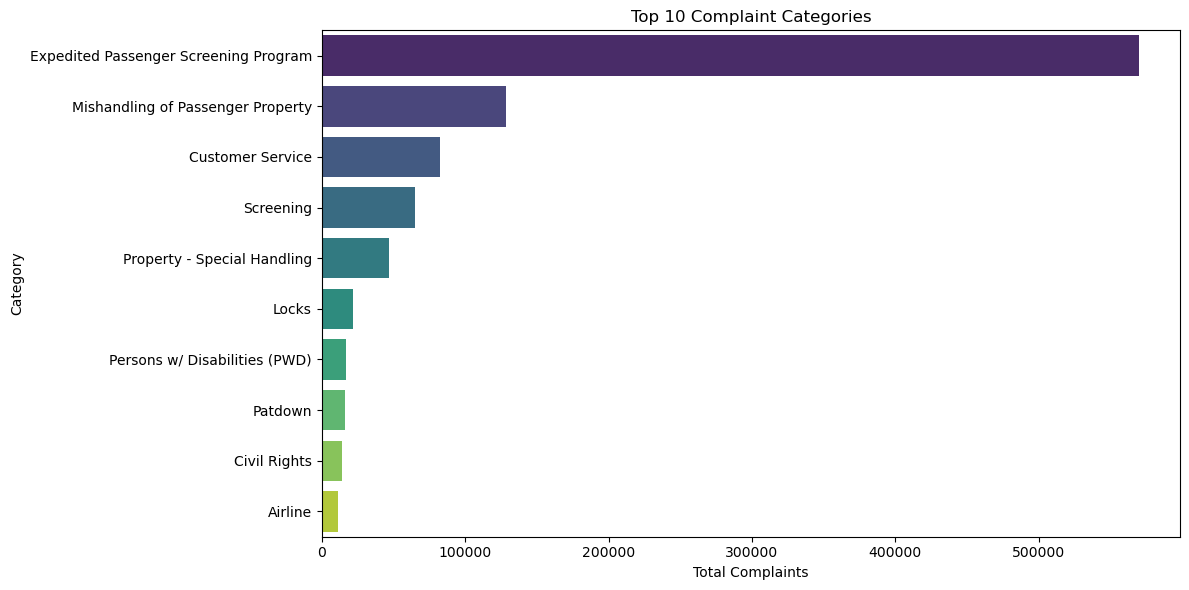

In [61]:
category_totals = category_df.groupby('clean_cat')['count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_totals.values, y=category_totals.index, palette='viridis')
plt.title("Top 10 Complaint Categories")
plt.xlabel("Total Complaints")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Custom Visual - Sunburst using Plotly

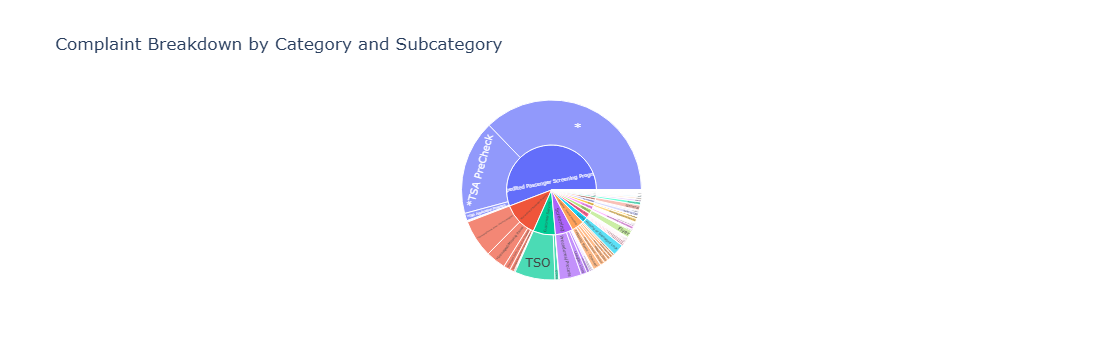

In [64]:
sunburst_data = subcategory_df.groupby(['clean_cat', 'clean_subcat'])['count'].sum().reset_index()

fig = px.sunburst(
    sunburst_data,
    path=['clean_cat', 'clean_subcat'],
    values='count',
    title="Complaint Breakdown by Category and Subcategory"
)
fig.show()

# Airline Complaint Data Analysis: Summary and Storytelling Design
**Audience, Purpose, and Medium**

The primary audience for this analysis includes transportation oversight agencies (e.g., TSA, FAA), airport administrators, and airline customer experience teams. The purpose is to uncover patterns in public complaints across U.S. airports and help stakeholders prioritize service improvements, operational transparency, and passenger safety. The medium is an interactive data story developed using Python visualizations, which allows for efficient exploration and pattern recognition across temporal, categorical, and geographic dimensions.

**Summary of Visuals and Design Choices**

To convey the findings effectively, six diverse visualizations were created:

* A **heat map** showing monthly complaint volumes by airport uncovers hotspots of recurring issues.

* A **box plot** illustrates complaint distribution by category, highlighting categories with wide variation.

* A **spatial scatter map** plots complaint intensity geographically, revealing regional concentrations.

* A **line chart** tracks complaint trends at the five most-impacted airports over time.

* A **bar plot** ranks the top complaint categories overall.

* A **sunburst chart** (represented with a table fallback) drills down from categories to subcategories.

Color palettes were chosen for clarity—reds for intensity-based maps and purples/greens for category visuals. Monthly and airport-level aggregation ensures temporal and spatial context.

**Ethical Considerations and Assumptions**

The data was sourced from public records and appears ethically obtained. However, privacy is a concern—while individual complaints aren’t disclosed, any future drill-down into personally identifiable information must be avoided. The analysis assumes that complaint counts are a valid proxy for performance issues, though it does not account for airport size or traffic volume (which could bias results toward busier airports). Also, some airports lacked geolocation data and were excluded from the spatial map.

Data cleaning preserved original category names while standardizing formatting. No records were removed without traceability. However, interpreting high complaint counts without normalization (e.g., per passenger volume) may misrepresent severity if not communicated properly.

**Call to Action**

Agencies should focus on improving screening processes, baggage handling, and TSA PreCheck experiences—categories which dominate the complaint landscape. Airports with consistently high complaint volumes should undergo operational audits. Transparency dashboards could empower travelers and hold administrators accountable. Stakeholders must also invest in normalized performance metrics to provide balanced insights into airport service quality.